In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Self Organizing Map/Self_Organizing_Maps/Credit_Card_Applications.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[: , -1].values

In [3]:
print(x), print(y)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]
[0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 

(None, None)

# Features Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))  # Normalization
x = sc.fit_transform(x)


In [18]:
!pip install MiniSom


  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=1b52e6f7d572b874caf7be260e209aa486202c1504fbc03eb1ea0ebafb5700c6
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


In [21]:
from minisom import MiniSom

In [23]:
som = MiniSom(x = 10 , y = 10 , input_len = 15 , sigma = 1.0 , learning_rate = 0.5)

In [24]:
som.random_weights_init(x) # initialize the weights
som.train_random(data = x , num_iteration = 100)


In [26]:
## Visualizing the results
from pylab import bone , pcolor , colorbar , plot , show


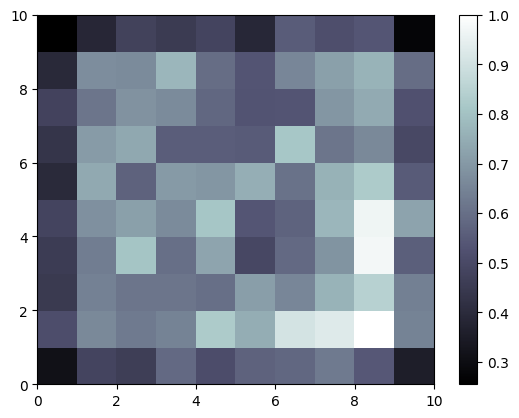

In [28]:
bone()
pcolor(som.distance_map().T)  # Transpose of the MID matrix returned by the distance_map function of som class
colorbar()  ## Highest MID value range to 1 and lowest MID value range is 0
## Ie highest the mid ie they are outliers as potential frauds

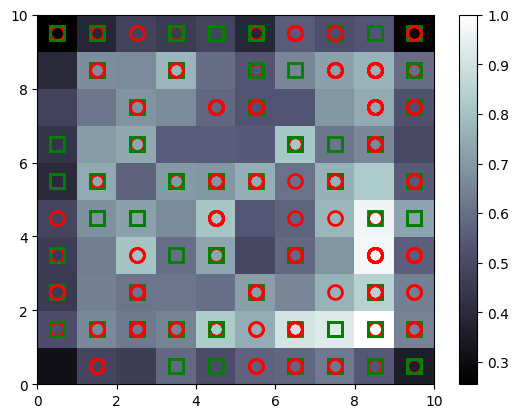

In [29]:
# Add some markers to indicate the customers who get approval or who dont get approval
# where red is being used for who donot get approval and green who get the approval
bone()
pcolor(som.distance_map().T)  # Transpose of the MID matrix returned by the distance_map function of som class
colorbar()
markers = ['o' , 's'] # o = circle and s = square
colors = ['r' , 'g']  # r = red and g = green
for i, k in enumerate(x):
  w = som.winner(k)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10 ,
       markeredgewidth = 2) # put marker at the centre
show()

In [37]:
## Finding the frauds

mappings = som.win_map(x)
frauds = np.concatenate((mappings[(8,1)] , mappings[(8,3)] , mappings[(8,4)]),axis = 0)


In [38]:
frauds = sc.inverse_transform(frauds)

print('Fraud Customer IDs')
for i in frauds[:, 0]:

  print(int(i))
  print('\n')

Fraud Customer IDs
15712877


15583067


15748499


15781975


15705506


15594305


15664793


15670029


15763579


15662189


15793825


15696361


15568469


15782159


15586479


15717700


15705379


15750104


15646535


15749964


15682540


15800773


